In [1]:

import matplotlib.pyplot as plt
import numpy as np
import xlrd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox




list_of_period = [5,10,15,20,25,30]
list_of_k = [1,1.5,2]
period = 20
k = 2

# Read the data from the Excel file
xls_file = '/home/vishi/bolinger/cumul_ohlc.xls'
xls = xlrd.open_workbook(xls_file)
sheet = xls.sheet_by_index(0)
# Extract the data
closing_prices = []
for row in range(1, sheet.nrows):
    closing_prices.append(sheet.cell_value(row, 4))

# closing_prices = closing_prices[:len(closing_prices)//2]

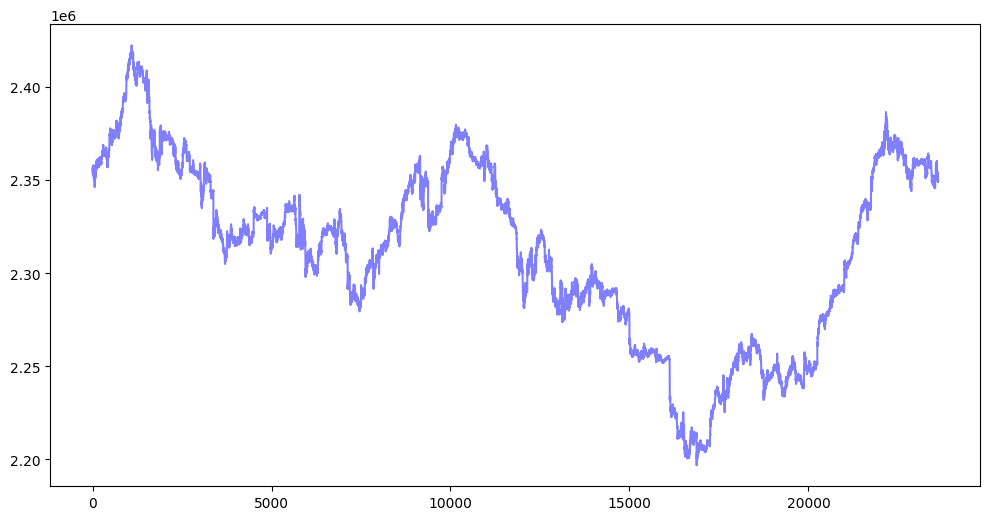

In [2]:
# plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(closing_prices, label='Closing Prices', color='blue', alpha=0.5)
plt.show()

In [3]:
# test ADF for closing prices
result_cloing_prices = adfuller(closing_prices)
print('ADF Statistic for closing prices: %f' % result_cloing_prices[0])
print('p-value for closing prices: %f' % result_cloing_prices[1])


ADF Statistic for closing prices: -1.390804
p-value for closing prices: 0.586677


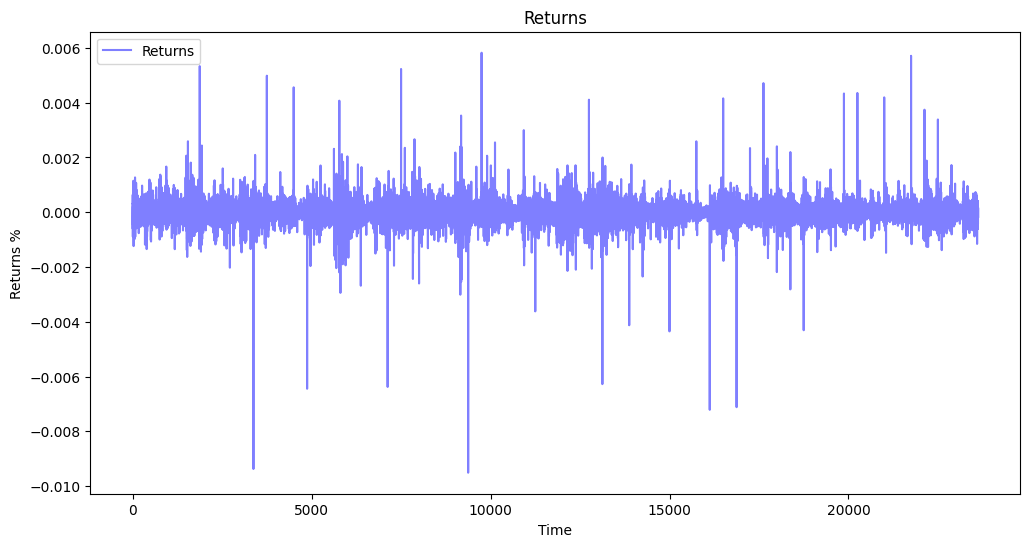

In [4]:
# i need a new ts that is returns_percent %
closing_prices_np = np.array(closing_prices)
diff_closing_prices = np.diff(closing_prices)
returns_percent = (diff_closing_prices / closing_prices_np[:-1]) 
# plot the returns_percent
plt.figure(figsize=(12, 6))
plt.plot(returns_percent, label='Returns', color='blue', alpha=0.5)
plt.title('Returns')
plt.xlabel('Time')
plt.ylabel('Returns %')
plt.legend()
plt.show()





In [ ]:
result = adfuller(returns_percent)
print('ADF Statistic for returns: %f' % result[0])
print('p-value for returns: %f' % result[1])

ADF Statistic for returns: -29.040517
p-value for returns: 0.000000


In [ ]:
return_percent_series = pd.Series(returns_percent)
# Ljung–Box test (check up to lag 10)
ljung_box_results = acorr_ljungbox(return_percent_series,lags=[10] ,return_df=True)
print(ljung_box_results)

      lb_stat     lb_pvalue
10  83.629521  9.720924e-14


<Figure size 1200x600 with 0 Axes>

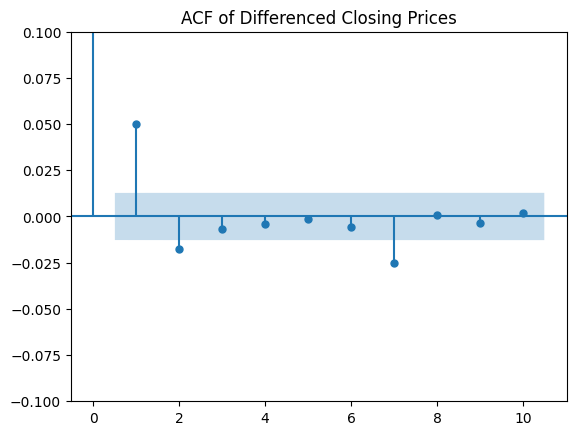

<Figure size 1200x600 with 0 Axes>

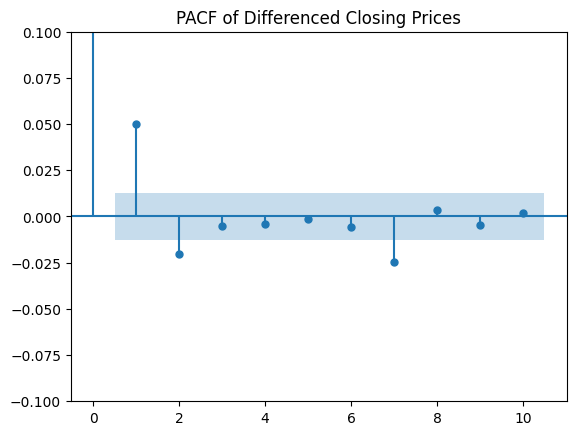

In [ ]:
# remove the lag 0 start from lag 1
plt.figure(figsize=(12, 6))
plot_acf(returns_percent, lags=10)
# i want yscale to be between 106-3 to -10^-3
plt.ylim(-0.1, 0.1)
plt.title('ACF of Differenced Closing Prices')
plt.show()
plt.figure(figsize=(12, 6))
plot_pacf(returns_percent, lags=10)
plt.ylim(-0.1, 0.1)
plt.title('PACF of Differenced Closing Prices')
plt.show()

In [8]:
# fit arima model
warnings.simplefilter('ignore', ConvergenceWarning)
model = ARIMA(returns_percent, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())
# plot the residuals
# residuals = model_fit.resid
# plt.figure(figsize=(12, 6))
# plt.plot(residuals, label='Residuals', color='blue', alpha=0.5)
# plt.title('Residuals of ARIMA Model')
# plt.xlabel('Time')
# plt.ylabel('Residuals')
# plt.legend()
# plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                23624
Model:                 ARIMA(1, 0, 1)   Log Likelihood              152163.729
Date:                Fri, 16 May 2025   AIC                        -304319.458
Time:                        09:19:58   BIC                        -304287.178
Sample:                             0   HQIC                       -304308.981
                              - 23624                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.645e-08   2.65e-06     -0.010      0.992   -5.22e-06    5.16e-06
ar.L1         -0.2617      0.002   -137.050      0.000      -0.265      -0.258
ma.L1          0.3125      0.002    162.811      0.0

In [9]:
warnings.simplefilter('ignore', ConvergenceWarning)
model = ARIMA(returns_percent, order=(2, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                23624
Model:                 ARIMA(2, 0, 2)   Log Likelihood              152165.864
Date:                Fri, 16 May 2025   AIC                        -304319.727
Time:                        09:20:19   BIC                        -304271.307
Sample:                             0   HQIC                       -304304.012
                              - 23624                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.645e-08   2.59e-06     -0.010      0.992    -5.1e-06    5.05e-06
ar.L1          0.5060      0.002    266.151      0.000       0.502       0.510
ar.L2          0.0483      0.002     21.267      0.0

In [10]:
warnings.simplefilter('ignore', ConvergenceWarning)
model = ARIMA(returns_percent, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                23624
Model:                 ARIMA(1, 0, 0)   Log Likelihood              152159.980
Date:                Fri, 16 May 2025   AIC                        -304313.960
Time:                        09:20:32   BIC                        -304289.750
Sample:                             0   HQIC                       -304306.103
                              - 23624                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.645e-08   2.68e-06     -0.010      0.992   -5.28e-06    5.23e-06
ar.L1          0.0498      0.004     13.182      0.000       0.042       0.057
sigma2      1.489e-07   2.32e-10    640.932      0.0

In [11]:
warnings.simplefilter('ignore', ConvergenceWarning)
model = ARIMA(returns_percent, order=(0, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                23624
Model:                 ARIMA(0, 0, 1)   Log Likelihood              152161.098
Date:                Fri, 16 May 2025   AIC                        -304316.196
Time:                        09:20:42   BIC                        -304291.986
Sample:                             0   HQIC                       -304308.339
                              - 23624                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.645e-08   2.68e-06     -0.010      0.992   -5.27e-06    5.22e-06
ma.L1          0.0507      0.004     13.252      0.000       0.043       0.058
sigma2      1.489e-07   2.32e-10    640.828      0.0

In [12]:
# warnings.simplefilter('ignore', ConvergenceWarning)
# model = ARIMA(returns_percent, order=(7, 0, 7))
# model_fit = model.fit()
# print(model_fit.summary())

#### ARIMA(1,0,1) is the best
 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                23624
Model:                 ARIMA(1, 0, 1)   Log Likelihood              152163.729
Date:                Fri, 16 May 2025   AIC                        -304319.458
Time:                        09:21:11   BIC                        -304287.178
Sample:                             0   HQIC                       -304308.981
                              - 23624                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.645e-08   2.65e-06     -0.010      0.992   -5.22e-06    5.16e-06
ar.L1         -0.2617      0.002   -137.050      0.000      -0.265      -0.258
ma.L1          0.3125      0.002    162.811      0.0

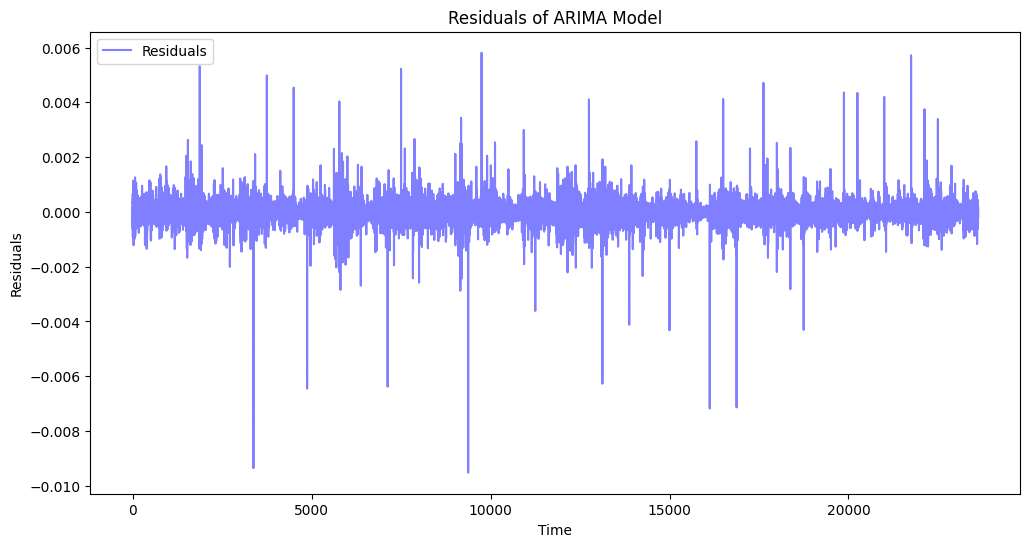

In [13]:
warnings.simplefilter('ignore', ConvergenceWarning)
model = ARIMA(returns_percent, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())
# plot the residuals_of_best_model
residuals_of_best_model = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals_of_best_model, label='Residuals', color='blue', alpha=0.5)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()



In [14]:
# forecast 20 values
forecast = model_fit.forecast(steps=1)
print(forecast)

[1.01463593e-05]


In [15]:
type(forecast)

numpy.ndarray

In [16]:
from statsmodels.stats.diagnostic import het_arch

# Test if there's autoregressive conditional heteroskedasticity (ARCH effect)
arch_test = het_arch(residuals_of_best_model)
print(f'ARCH test p-value: {arch_test[1]}')  # p < 0.05 → GARCH justified


ARCH test p-value: 4.750247118621118e-05


/home/vishi/bolinger/.venv/lib/python3.13/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.489e-07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vishi/bolinger/.venv/lib/python3.13/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                153139.
Distribution:                  Normal   AIC:                          -306271.
Method:            Maximum Likelihood   BIC:                          -306238.
                                        No. Observations:                23624
Date:                Fri, May 16 2025   Df Residuals:                    23623
Time:                        09:21:12   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.3682e-10  8.749e-07  3.850e-04      1.000 

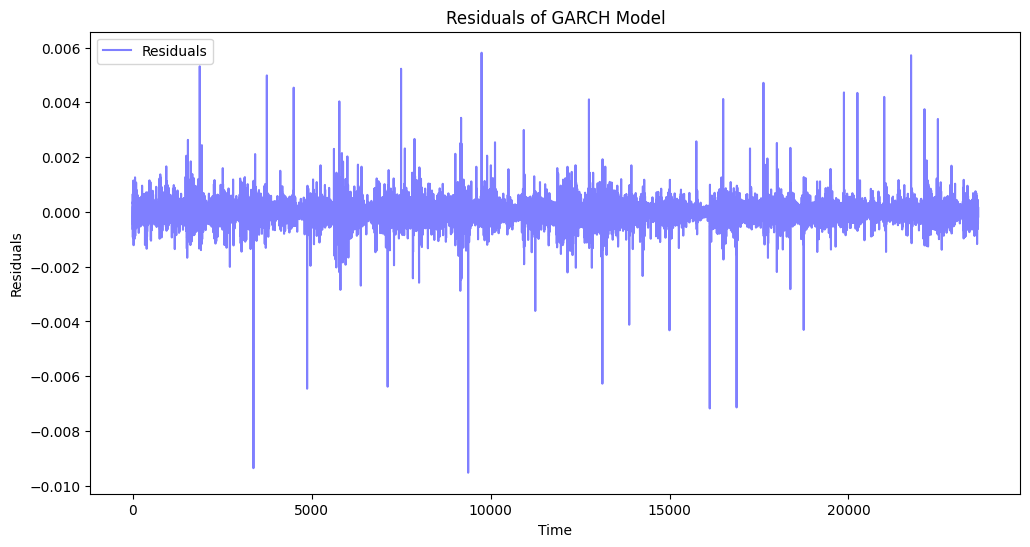

In [17]:
# fit a GRACH model
from arch import arch_model
model = arch_model(residuals_of_best_model, vol='Garch', p=1, q=1)
model_fit = model.fit(disp="off")
print(model_fit.summary())
# plot the residuals of the GARCH model
plt.figure(figsize=(12, 6))
plt.plot(model_fit.resid, label='Residuals', color='blue', alpha=0.5)
plt.title('Residuals of GARCH Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()
# prediction = model_fit.forecast(horizon=10)
# print(prediction.variance.values[-1, :])

In [ ]:
# warnings.simplefilter('ignore', ConvergenceWarning)
# residuals_of_best_model = model_fit.resid *1000
for i in range(1,3):
    for j in range(3):
        if i+j >0:
            model = arch_model(residuals_of_best_model, vol='Garch', p=i, q=j)
            model_fit = model.fit(disp="off")
            print(model_fit.summary())
            print(f'GARCH({i},{j}) AIC: {model_fit.aic}')

In [29]:
def bollinger_bands_from_models(model_fit_arima, model_fit_garch, k=2,steps=1): 
    '''
    Calculates the upper, middle, and lower Bollinger Bands using the ARIMA and GARCH fitted models.
    The middle band is the ARIMA forecast, and the upper/lower bands are based on the GARCH conditional volatility.

    ---
    #### Input
    model_fit_arima - fitted ARIMA model object
    model_fit_garch - fitted GARCH model object
    k - number of standard deviations for the bands

    ---
    #### Output
    middle_band - ARIMA forecast
    upper_band - middle_band + k * forecasted volatility (float)
    lower_band - middle_band - k * forecasted volatility (float)
    '''
    # Forecast the next value and volatility
    arima_forecast = model_fit_arima.forecast(steps=steps)
    garch_forecast = model_fit_garch.forecast(horizon=steps)
    volatility = np.sqrt(garch_forecast.variance.values[-1, 0])

    middle_band = arima_forecast
    upper_band = middle_band + ((k * volatility)/1000000)
    lower_band = middle_band - ((k * volatility)/1000000)

    return upper_band, middle_band, lower_band

In [ ]:
# testing_band_return = returns_percent[:100]
# model_test = ARIMA(testing_band_return, order=(1, 0, 1))
# model_fit_test = model_test.fit()
# residuals_of_best_model_test = model_fit_test.resid
# scaled_residuals_of_best_model_test = residuals_of_best_model_test * 1000
# model_test_garch = arch_model(scaled_residuals_of_best_model_test, vol='Garch', p=1, q=1)
# model_fit_test_garch = model_test_garch.fit(disp="off")
# save_thisdat = bollinger_bands_from_models(model_fit_test, model_fit_test_garch, k=2, steps=20)

/home/vishi/bolinger/.venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/vishi/bolinger/.venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
# print(len(save_thisdat[0]))

20


In [20]:
returns_percent.shape

(23624,)

In [35]:
# now i have data for 3 months i want to train the model on the first 1  onth predict on 20 mins after that train it on 1 moth +20 mins and then predict the next 20 min
from arch import arch_model

def train_and_predict_bollinger_bands(returns_percent, start = 7100,predict=20, k=2): 
    '''
    Trains the ARIMA and GARCH models on the returns_percent data and predicts the Bollinger Bands for the next period.

    ---
    #### Input
    returns_percent - returns percent data
    model_fit_arima - fitted ARIMA model object
    model_fit_garch - fitted GARCH model object
    period - number of periods to predict
    k - number of standard deviations for the bands

    ---
    #### Output
    upper_band - upper Bollinger Band (float)
    middle_band - middle Bollinger Band (float)
    lower_band - lower Bollinger Band (float)
    '''
    n = 23620-7100
    upper_band = []
    middle_band = []
    lower_band = []
    # Train the models on the first month of data
    index = 0
    max_index = n//period
    print(max_index)
    for i in range(max_index):
        # Train the ARIMA model
        if i% 20 == 0:
            print(f"Training on {i} ")
        model = ARIMA(returns_percent[:start], order=(1, 0, 1))
        model_fit_arima = model.fit()
        residuals_of_model_fit_arima = model_fit_arima.resid
        # Train the GARCH model
        residuals_of_model_fit_arima_scaled = residuals_of_model_fit_arima * 1000
        model = arch_model(residuals_of_model_fit_arima_scaled, vol='Garch', p=1, q=0)
        model_fit_garch = model.fit(disp="off")
        # Predict the next 20 minutes
        variable = i*20
        # print(bollinger_bands_from_models(model_fit_arima, model_fit_garch, k=2, steps=20))

        # upper_band[variable:variable+20], middle_band[variable:variable+20], lower_band[variable:variable+20] = bollinger_bands_from_models(model_fit_arima, model_fit_garch, k=k, steps=20)
        up, mid, low = bollinger_bands_from_models(model_fit_arima, model_fit_garch, k=k, steps=predict)
        # upper_band[variable:variable+predict] = up
        # middle_band[variable:variable+predict] = mid
        # lower_band[variable:variable+predict] = low
        # upper_band += up
        # middle_band += mid
        # lower_band += low
        upper_band.extend(up)
        middle_band.extend(mid)
        lower_band.extend(low)
        start += predict
    return upper_band, middle_band, lower_band
upper_band, middle_band, lower_band = train_and_predict_bollinger_bands(returns_percent, start=7100, predict=20, k=2)
# print(bollinger_bands_from_models(model_fit_arima, model_fit_garch, k=2, steps=20))
        


826
Training on 0 
Training on 20 
Training on 40 
Training on 60 
Training on 80 
Training on 100 
Training on 120 
Training on 140 
Training on 160 
Training on 180 
Training on 200 
Training on 220 
Training on 240 
Training on 260 
Training on 280 
Training on 300 
Training on 320 
Training on 340 
Training on 360 
Training on 380 
Training on 400 
Training on 420 
Training on 440 
Training on 460 
Training on 480 
Training on 500 
Training on 520 
Training on 540 
Training on 560 
Training on 580 
Training on 600 
Training on 620 
Training on 640 
Training on 660 
Training on 680 
Training on 700 
Training on 720 
Training on 740 
Training on 760 
Training on 780 
Training on 800 
Training on 820 


In [39]:
np_upper_band = np.array(upper_band)
np_middle_band = np.array(middle_band)
np_lower_band = np.array(lower_band)

updated_upper_band = np_upper_band - np_middle_band
updated_lower_band = np_lower_band - np_middle_band

updated_upper_band = updated_upper_band * 1000
updated_lower_band = updated_lower_band * 1000
# updated_upper_band = np_upper_band - np_middle_band\

updated_upper_band = np_upper_band + np_middle_band
updated_lower_band = np_lower_band + np_middle_band

In [40]:
updated_middle_band = np_middle_band


In [46]:
len(updated_upper_band) 


16520

In [47]:
# save the data to a csv file
updated_closing_prices = np.array(closing_prices)[7101:23621]
# saVE THE DATA TO A CSV FILE   
df = pd.DataFrame({
    'closing_prices': updated_closing_prices,
    'upper_band': updated_upper_band,
    'middle_band': updated_middle_band,
    'lower_band': updated_lower_band
})
df.to_csv('/home/vishi/bolinger/arima_garch_pred20.csv', index=False)